In [1]:
import openpyxl as op
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

적산전력 시트: 20180101-20211231 빠진 날짜 없음

In [ ]:
df=pd.read_excel('../가공-도장-조립 취합_전체.xlsx').drop(['Unnamed: 0'], axis=1).transpose()

print(df)

gagong_weight = df.values.tolist()[1][:1663]
gagong_length = df.values.tolist()[2][:1663]
dojang_pyomeyun = df.values.tolist()[3][:1663]
dojang_dojang = df.values.tolist()[4][:1663]
jorip_weight = df.values.tolist()[5][:1663]
jorip_length = df.values.tolist()[6][:1663]
jorip_yongchack = df.values.tolist()[7][:1663]
elec_use = df.values.tolist()[8][:1663]
elec_peak = df.values.tolist()[9][:1663]

print(elec_use)
print(elec_peak)
#a.plot(figsize=(20,10)).legend(bbox_to_anchor=(1.0, 1.0),fontsize='large')

In [3]:
print(len(elec_peak))
for i in range(1663):
    if elec_peak[i] == 0:
        mean = 0
        for j in range(i-10, i+11):
            mean += elec_peak[j]
        mean = mean / 20
        elec_peak[i] = mean

print(len(elec_use))
for i in range(1663):
    if elec_use[i] == 0:
        mean = 0
        for j in range(i-10, i+11):
            mean += elec_use[j]
        mean = mean / 20
        elec_use[i] = mean

1663
1663


첫번째 시트, 빠진 날짜 다소 존재

<h1>전처리 마친 정리 시트</h1>

In [ ]:
test=[]
test.append(elec_peak)
test.append(elec_use)
print(test)

PEAK vs 시운전호선 - PEAK

In [ ]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
import numpy as np
from sklearn.model_selection import train_test_split

#x=features, y=peak
X_train = []
X_train.append(np.array(gagong_weight, dtype=object))
X_train.append(np.array(gagong_length, dtype=object))
X_train.append(np.array(dojang_pyomeyun, dtype=object))
X_train.append(np.array(dojang_dojang, dtype=object))
X_train.append(np.array(jorip_weight, dtype=object))
X_train.append(np.array(jorip_length, dtype=object))
X_train.append(np.array(jorip_yongchack, dtype=object))
X_train=np.array(X_train).transpose()

y_train = np.array(elec_peak, dtype=object)
xtrain, xtest, ytrain, ytest=te=train_test_split(X_train, y_train, test_size=0.2)
xgb_model = xgboost.XGBRegressor(base_score=0.5, booster="gbtree", colsample_bylevel=1, colsample_bynode=1, 
                                 colsample_bytree=1, gpu_id=-1, importance_type="gain", interaction_constraints='', learning_rate=0.1, 
                                 max_delta_step=0, max_depth=5, min_child_weight=1, monotone_constraints='()', n_estimators=100, 
                                 gamma=0, n_jobs=0, num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                                 subsample=1, tree_method="exact", validate_parameter=1, verbosity=None)

print(X_train.shape)
xgb_model.fit(X_train,y_train)
ypred=xgb_model.predict(xtest)
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original", alpha=1)
plt.plot(x_ax, ypred, label="predicted", alpha=1)
plt.title("USE")
plt.legend()
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

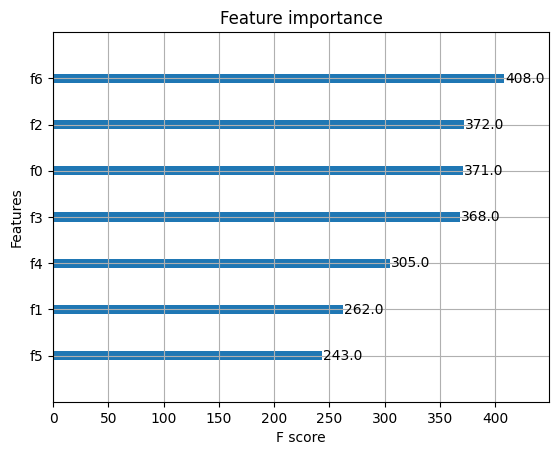

In [6]:
xgboost.plot_importance(xgb_model)
#부하율, 온도, 습도, 최고기온, 최고습도, 조립량, 조립량 전체
#  0     1      2     3        4        5       6

In [7]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)

# xgb_model.save_model("Peak_daily_model.txt")

0.9351565108886616


PEAK vs 시운전호선 - 총전력

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
import numpy as np

#x=features, y=peak
X_train_ = []
X_train_.append(np.array(gagong_weight, dtype=object))
X_train_.append(np.array(gagong_length, dtype=object))
X_train_.append(np.array(dojang_pyomeyun, dtype=object))
X_train_.append(np.array(dojang_dojang, dtype=object))
X_train_.append(np.array(jorip_weight, dtype=object))
X_train_.append(np.array(jorip_length, dtype=object))
X_train_.append(np.array(jorip_yongchack, dtype=object))
X_train_=np.array(X_train_).transpose()

y_train_ = np.array(elec_use, dtype=object)
xtrain, xtest, ytrain, ytest=te=train_test_split(X_train_, y_train_, test_size=0.2)
xgb_model_ = xgboost.XGBRegressor(base_score=0.5, booster="gbtree", colsample_bylevel=1, colsample_bynode=1, 
                                 colsample_bytree=1, gpu_id=-1, importance_type="gain", interaction_constraints='', learning_rate=0.1, 
                                 max_delta_step=0, max_depth=5, min_child_weight=1, monotone_constraints='()', n_estimators=100, 
                                 gamma=0, n_jobs=0, num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                                 subsample=1, tree_method="exact", validate_parameter=1, verbosity=None)

print(X_train_.shape)
xgb_model_.fit(xtrain,ytrain)
ypred=xgb_model_.predict(xtest)
res = range(len(ytest))
plt.plot(res, ytest, label="original")
plt.plot(res, ypred, label="predicted")
plt.title("TOTAL ELEC")
plt.legend()
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

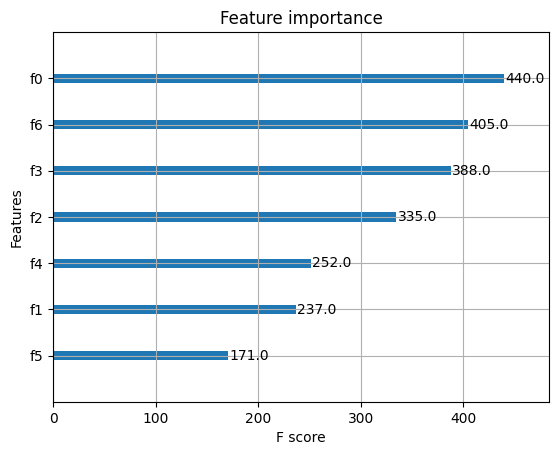

In [9]:
xgboost.plot_importance(xgb_model_)
#부하율, 온도, 습도, 최고기온, 최고습도, 조립량, 조립량 전체
#  0     1      2     3        4        5       6

In [10]:
r_sq = xgb_model_.score(xtrain, ytrain)
print(r_sq)

# xgb_model_.save_model("Use_daily_model.txt")

r_sq = xgb_model.score(X_train, y_train)
print(r_sq)

# xgb_model.save_model("Peak_daily_model.txt")

print(gagong_weight[1000], gagong_length[1000], dojang_pyomeyun[1000], dojang_dojang[1000], jorip_weight[1000], jorip_length[1000], jorip_yongchack[1000], elec_use[1000], elec_peak[1000])

0.9245410453616214
0.9351565108886616
1704.660801819928 16195.662530721 30726.44 46571.54063159062 3269.384258414257 20093.63625930779 1284.142036791238 1186234.56 76708.79999999999
